In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#läser in parquet-filen
wine=pd.read_parquet('wine_parquet')

In [3]:
#ändrar dtypes på kolumner country, province, variety och winery
wine['country']=wine['country'].astype('category')
wine['description']=wine['description'].astype('string')
wine['variety']=wine['variety'].astype('category')
wine['winery']=wine['winery'].astype('category')

In [4]:
#tar bort de kolumner som vi inte är intresserade av i den här analysen
wine=wine.drop(columns=['region_1', 'region_2', 'designation', 'price','province'])
#tar bort de rader som saknar land
wine=wine.dropna(subset=['country'])
#tar bort dubeltter
wine=wine.drop_duplicates(keep='first')
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97842 entries, 0 to 149639
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   country      97842 non-null  category
 1   description  97842 non-null  string  
 2   points       97842 non-null  int64   
 3   variety      97842 non-null  category
 4   winery       97842 non-null  category
dtypes: category(3), int64(1), string(1)
memory usage: 3.3 MB


In [5]:
#Viner med 100 poäng 
wines_with_100_points=wine[wine['points']==100]
wines_with_100_points_grouped=wines_with_100_points.groupby('variety')['points'].mean()
wines_with_100_points_grouped=wines_with_100_points_grouped.dropna()
wines_with_100_points_grouped


/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_48991/2708591122.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wines_with_100_points_grouped=wines_with_100_points.groupby('variety')['points'].mean()


variety
Bordeaux-style White Blend    100.0
Cabernet Blend                100.0
Cabernet Sauvignon            100.0
Chardonnay                    100.0
Merlot                        100.0
Muscat                        100.0
Pinot Noir                    100.0
Prugnolo Gentile              100.0
Red Blend                     100.0
Syrah                         100.0
Name: points, dtype: float64

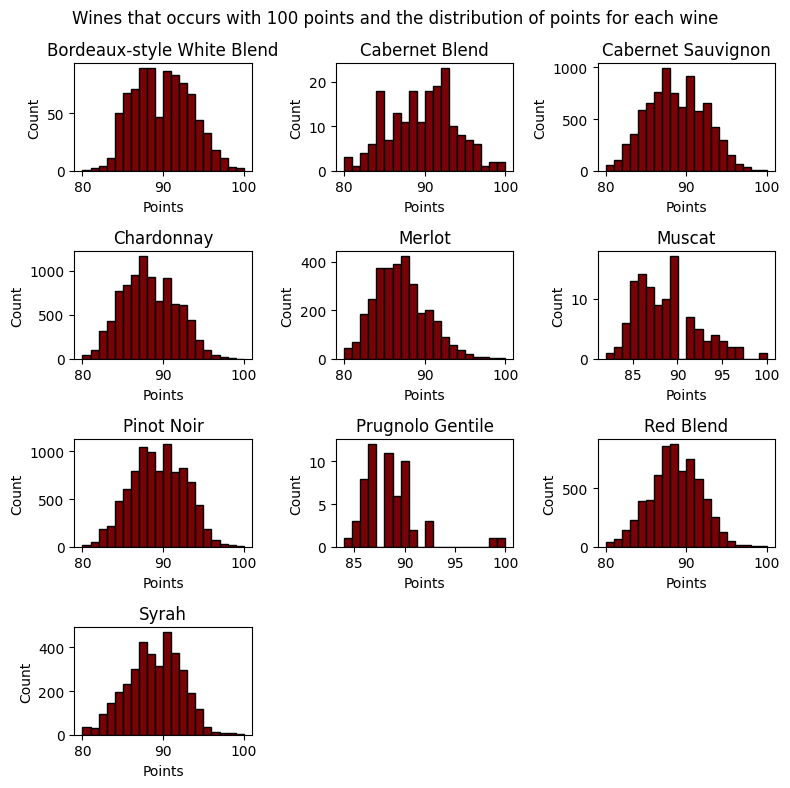

In [6]:
#Diagram 1
#Hur ser fördelningen ut över poäng för viner som förekommer med 100 poäng?
bordeaux_high_point= wine[wine['variety']=='Bordeaux-style White Blend']
cabernet_blend_high_point= wine[wine['variety']=='Cabernet Blend']
cabernet_sauvignon_high_point= wine[wine['variety']=='Cabernet Sauvignon']
chardonnay_high_point= wine[wine['variety']=='Chardonnay']
merlot_high_point= wine[wine['variety']=='Merlot']
muscat_high_point= wine[wine['variety']=='Muscat']
pinot_noir_high_point= wine[wine['variety']=='Pinot Noir']
prugnolo_gentile_high_point=wine[wine['variety']=='Prugnolo Gentile']
red_blend_high_point= wine[wine['variety']=='Red Blend']
syrah_high_point= wine[wine['variety']=='Syrah']

fig, axs=plt.subplots(4,3, figsize=(8,8))

axs[0,0].hist(bordeaux_high_point['points'], bins=20, color='#780206', edgecolor='black')
axs[0,0].set_title('Bordeaux-style White Blend')
axs[0,0].set_xlabel('Points')
axs[0,0].set_ylabel('Count')

axs[0,1].hist(cabernet_blend_high_point['points'], bins=20, color='#780206', edgecolor='black')
axs[0,1].set_title('Cabernet Blend')
axs[0,1].set_xlabel('Points')
axs[0,1].set_ylabel('Count')

axs[0,2].hist(cabernet_sauvignon_high_point['points'], bins=20, color='#780206', edgecolor='black')
axs[0,2].set_title('Cabernet Sauvignon')
axs[0,2].set_xlabel('Points')
axs[0,2].set_ylabel('Count')

axs[1,0].hist(chardonnay_high_point['points'], bins=20, color='#780206', edgecolor='black')
axs[1,0].set_title('Chardonnay')
axs[1,0].set_xlabel('Points')
axs[1,0].set_ylabel('Count')

axs[1,1].hist(merlot_high_point['points'], bins=20, color='#780206', edgecolor='black')
axs[1,1].set_title('Merlot')
axs[1,1].set_xlabel('Points')
axs[1,1].set_ylabel('Count')

axs[1,2].hist(muscat_high_point['points'], bins=20, color='#780206', edgecolor='black')
axs[1,2].set_title('Muscat')
axs[1,2].set_xlabel('Points')
axs[1,2].set_ylabel('Count')

axs[2,0].hist(pinot_noir_high_point['points'], bins=20, color='#780206', edgecolor='black')
axs[2,0].set_title('Pinot Noir')
axs[2,0].set_xlabel('Points')
axs[2,0].set_ylabel('Count')

axs[2,1].hist(prugnolo_gentile_high_point['points'], bins=20, color='#780206', edgecolor='black')
axs[2,1].set_title('Prugnolo Gentile')
axs[2,1].set_xlabel('Points')
axs[2,1].set_ylabel('Count')

axs[2,2].hist(red_blend_high_point['points'], bins=20, color='#780206', edgecolor='black')
axs[2,2].set_title('Red Blend')
axs[2,2].set_xlabel('Points')
axs[2,2].set_ylabel('Count')

axs[3,0].hist(syrah_high_point['points'], bins=20, color='#780206', edgecolor='black')
axs[3,0].set_title('Syrah')
axs[3,0].set_xlabel('Points')
axs[3,0].set_ylabel('Count')

fig.delaxes(axs[3][1])
fig.delaxes(axs[3][2])

fig.suptitle('Wines that occurs with 100 points and the distribution of points for each wine')

plt.tight_layout()
plt.savefig("Wines with 100 points and their distribution.png", bbox_inches=None)

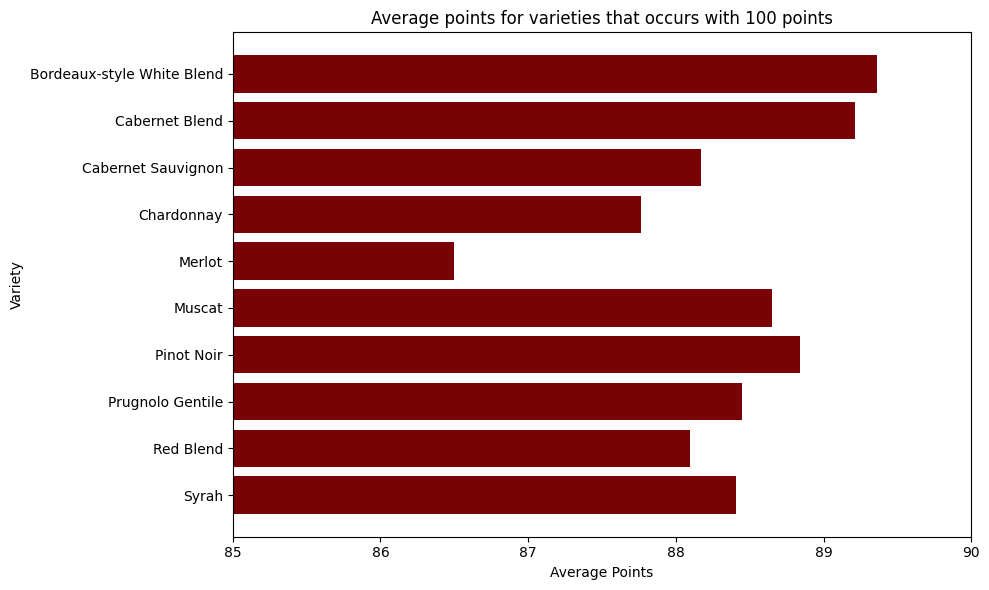

In [7]:
#Diagram 2
#Medelvärde på vinerna som förekommer med 100 poäng
bordeaux_mean=bordeaux_high_point['points'].mean()
cabernet_blend_mean=cabernet_blend_high_point['points'].mean()
cabernet_sauvignon_mean=cabernet_sauvignon_high_point['points'].mean()
chardonnay_mean=chardonnay_high_point['points'].mean()
merlot_mean=merlot_high_point['points'].mean()
muscat_mean=muscat_high_point['points'].mean()
pinot_noir_mean=pinot_noir_high_point['points'].mean()
prugnolo_gentile_mean=prugnolo_gentile_high_point['points'].mean()
red_blend_mean=red_blend_high_point['points'].mean()
syrah_mean=syrah_high_point['points'].mean()

varieties_mean_names=['Bordeaux-style White Blend','Cabernet Blend' ,'Cabernet Sauvignon', 'Chardonnay','Merlot','Muscat','Pinot Noir', 'Prugnolo Gentile', 'Red Blend','Syrah']
varieties_mean=[bordeaux_mean,cabernet_blend_mean, cabernet_sauvignon_mean, chardonnay_mean, merlot_mean, muscat_mean, pinot_noir_mean, prugnolo_gentile_mean, red_blend_mean, syrah_mean]

plt.figure(figsize=(10,6))
plt.barh(varieties_mean_names, varieties_mean, color='#780206')
plt.xlabel('Average Points')
plt.ylabel('Variety')
plt.title('Average points for varieties that occurs with 100 points')
plt.xlim(85,90)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.savefig("Average points of wine also with 100 p.png", bbox_inches=None)

In [8]:
#vinerna med högst betyg, finns de även bland de vanligaste vinerna?
comparison_high_point=wine[wine['points']==100]
comparison_high_point_unique=comparison_high_point['variety'].unique()

#De vanligast förekommande vinsorterna är
most_common_15=wine['variety'].value_counts()
most_common_15.head(10)

comparison_most_common=wine['variety'].value_counts().head(10).index.tolist()
comparison_most_common_high_point=comparison_high_point[comparison_high_point['variety'].isin(comparison_most_common)]
comparison_most_common_high_point['variety'].unique()

#6 st av vinsorterna med högst poäng finns bland de vanligast förekommande. Dessa är; 
#Cabernet Sauvignon, Chardonnay, Merlot, Pinot Noir, Red Blend och Syrah. 4 st sorter av de 
#som fått 100 poäng finns inte med bland de vanligaste. dessa är; Bordeaux-style White Blend,
#Cabernet Blend, Muscat, Prugnolo Gentile.


['Syrah', 'Merlot', 'Chardonnay', 'Red Blend', 'Cabernet Sauvignon', 'Pinot Noir']
Categories (632, object): ['Agiorgitiko', 'Aglianico', 'Aidani', 'Airen', ..., 'Zinfandel', 'Zlahtina', 'Zweigelt', 'Žilavka']

In [9]:
#Vilka viner har lägst poäng, finns även de med högst poäng med här?
comparison_low_point=wine[wine['points']==80]
common_varieties=comparison_high_point['variety'].isin(comparison_low_point['variety'])
common_varieties_names=comparison_high_point[common_varieties]['variety'].unique()
common_varieties_names
#Dessa viner finns med både högst och lägst betyg; 'Bordeaux-style White Blend', 'Syrah', 
#'Merlot', 'Chardonnay','Red Blend', 'Cabernet Sauvignon', 'Pinot Noir', 'Cabernet Blend'.

['Bordeaux-style White Blend', 'Syrah', 'Merlot', 'Chardonnay', 'Red Blend', 'Cabernet Sauvignon', 'Pinot Noir', 'Cabernet Blend']
Categories (632, object): ['Agiorgitiko', 'Aglianico', 'Aidani', 'Airen', ..., 'Zinfandel', 'Zlahtina', 'Zweigelt', 'Žilavka']

/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_48991/4149024125.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  highest_mean_point=wine.groupby('variety')['points'].mean()


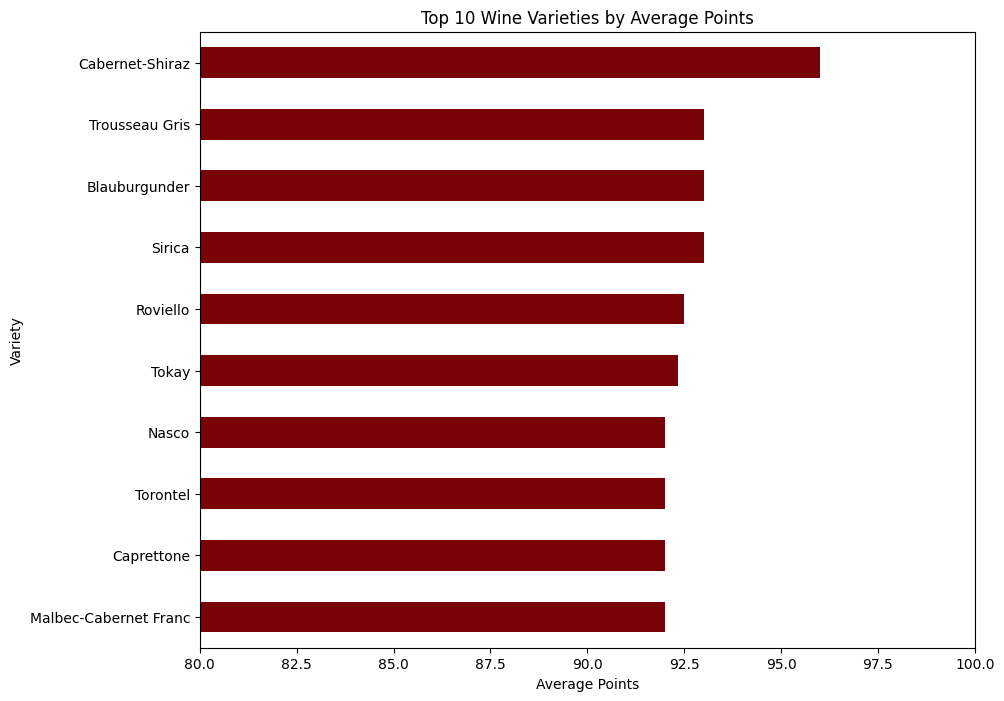

In [10]:
#Diagram 3
#Vilka viner har högst medelvärde?
highest_mean_point=wine.groupby('variety')['points'].mean()
top_10_varieties= highest_mean_point.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,8))
top_10_varieties.plot(kind='barh', color='#780206')
plt.xlabel('Average Points')
plt.ylabel('Variety')
plt.title('Top 10 Wine Varieties by Average Points')
plt.xlim(80,100)
plt.gca().invert_yaxis()
plt.savefig("Highest avg points all wines.png", bbox_inches=None)

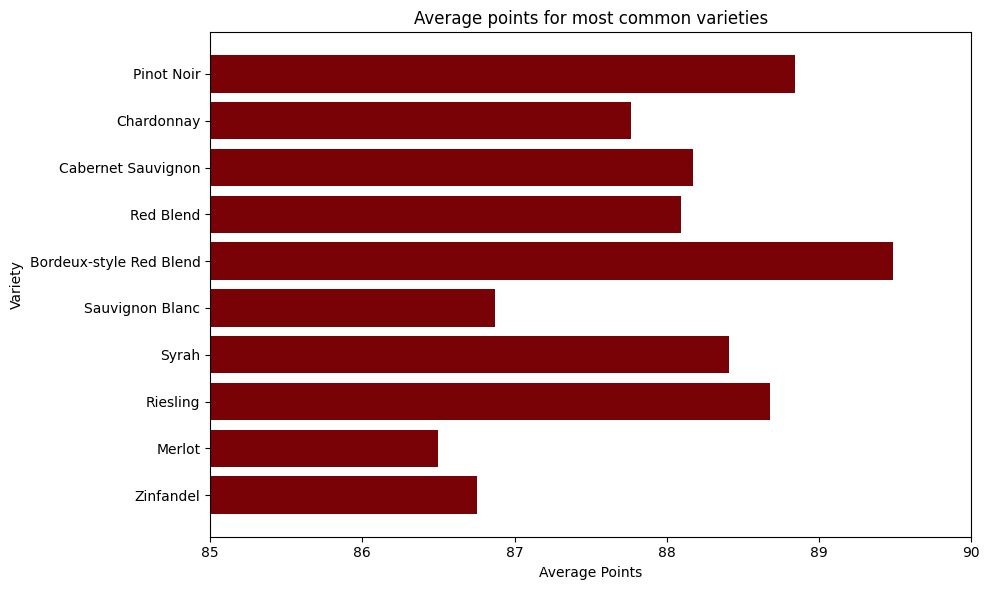

In [11]:
#Diagram 4
#medelpoäng på de mest producerade vinerna
most_common_wines=wine['variety'].value_counts()
#print(most_common_wines.head(10))
pinot_noir_most_common= wine[wine['variety']=='Pinot Noir']
chardonnay_most_common= wine[wine['variety']=='Chardonnay']
cabernet_sauvignon_most_common= wine[wine['variety']=='Cabernet Sauvignon']
red_blend_most_common= wine[wine['variety']=='Red Blend']
bordeaux_most_common= wine[wine['variety']=='Bordeaux-style Red Blend']
sauvignon_blanc_most_common= wine[wine['variety']=='Sauvignon Blanc']
syrah_most_common= wine[wine['variety']=='Syrah']
riesling_most_common= wine[wine['variety']=='Riesling']
merlot_most_common= wine[wine['variety']=='Merlot']
zinfandel_most_common= wine[wine['variety']=='Zinfandel']

pinot_noir_mean1=pinot_noir_most_common['points'].mean()
chardonnay_mean1=chardonnay_most_common['points'].mean()
cabernet_sauvignon_mean1=cabernet_sauvignon_most_common['points'].mean()
red_blend_mean1=red_blend_most_common['points'].mean()
bordeaux_mean1=bordeaux_most_common['points'].mean()
sauvignon_blanc_mean1=sauvignon_blanc_most_common['points'].mean()
syrah_mean1=syrah_most_common['points'].mean()
riesling_mean1=riesling_most_common['points'].mean()
merlot_mean1=merlot_most_common['points'].mean()
zinfandel_mean1=zinfandel_most_common['points'].mean()

varieties_mean1_names=['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend', 'Bordeux-style Red Blend', 'Sauvignon Blanc', 'Syrah', 'Riesling', 'Merlot', 'Zinfandel']
varieties_mean1=[pinot_noir_mean1, chardonnay_mean1, cabernet_sauvignon_mean1, red_blend_mean1, bordeaux_mean1, sauvignon_blanc_mean1, syrah_mean1, riesling_mean1, merlot_mean1, zinfandel_mean1]

plt.figure(figsize=(10,6))
plt.barh(varieties_mean1_names, varieties_mean1, color='#780206')
plt.xlabel('Average Points')
plt.ylabel('Variety')
plt.title('Average points for most common varieties')
plt.xlim(85,90)
plt.tight_layout()
plt.gca().invert_yaxis()
#plt.savefig("Average points of most common wines.png", bbox_inches=None)
